In [3]:
pip install Faker


Note: you may need to restart the kernel to use updated packages.


In [114]:
import sqlite3
from faker import Faker
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
fake = Faker()
faker = Faker('es_ES')
data = []


In [116]:
cnx = sqlite3.connect("bdd_testing.db") #CONEXION BDD
cursor = cnx.cursor()

In [122]:
#A.1 - Carga Dataset
ruta_xml = r"C:\Users\segur\Desktop\Data Science SL - The Bridge Repositorios\ONLINE_DS_THEBRIDGE_SL\EDA_Project_Occupancy_Report\SCR\DATA\datos_ocupacion\occupancy_report_full.xlsx"


In [123]:
# A.1 - Leer el archivo con Libreria Pandas
df = pd.read_excel(ruta_xml)
df



,AÑO,MES,TIPO_PERSONAL,DIA,OCUPACION,DIA SEMANA,HORA ACCESO
0,2023,2,EXTERNO,2023-02-01,78,miércoles,NaN
1,2023,2,INTERNO,2023-02-01,324,miércoles,NaN
2,2023,2,EXTERNO,2023-02-02,76,jueves,NaN
3,2023,2,INTERNO,2023-02-02,428,jueves,NaN
4,2023,2,EXTERNO,2023-02-03,79,viernes,NaN
...,...,...,...,...,...,...,...
1422,2025,4,INTERNO,2025-04-28,362,lunes,NaN
1423,2025,4,EXTERNO,2025-04-29,57,martes,NaN
1424,2025,4,INTERNO,2025-04-29,100,martes,NaN
1425,2025,4,EXTERNO,2025-04-30,63,miércoles,NaN


In [124]:
#A.2 - Identificacion de errores en dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AÑO            1427 non-null   int64         
 1   MES            1427 non-null   int64         
 2   TIPO_PERSONAL  1427 non-null   object        
 3   DIA            1427 non-null   datetime64[ns]
 4   OCUPACION      1427 non-null   int64         
 5   DIA SEMANA     1427 non-null   object        
 6   HORA ACCESO    0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 78.2+ KB


In [125]:
#A.2 - Descripcion de valores 
df.describe()

,AÑO,MES,DIA,OCUPACION,HORA ACCESO
count,1427.000000,1427.000000,1427,1427.000000,0.0
mean,2023.742116,6.117730,2024-02-14 11:52:25.900490496,155.341275,NaN
min,2023.000000,1.000000,1900-01-01 00:00:00,1.000000,NaN
25%,2023.000000,3.000000,2023-08-24 00:00:00,51.000000,NaN
50%,2024.000000,6.000000,2024-03-17 00:00:00,80.000000,NaN
75%,2024.000000,9.000000,2024-10-08 00:00:00,219.500000,NaN
max,2025.000000,12.000000,2025-04-30 00:00:00,1073.000000,NaN
std,0.700180,3.431377,NaN,173.771228,NaN


In [126]:
df["OCUPACION"].describe()      
#Tenemos valores interesantes como OCUPACION MAXIMA de 1073 personas

count    1427.000000
mean      155.341275
std       173.771228
min         1.000000
25%        51.000000
50%        80.000000
75%       219.500000
max      1073.000000
Name: OCUPACION, dtype: float64

In [129]:
#Limpieza de Data 
# Verificar tipos, nulos y duplicados
df["DIA"] = pd.to_datetime(df["DIA"], dayfirst=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AÑO            1427 non-null   int64         
 1   MES            1427 non-null   int64         
 2   TIPO_PERSONAL  1427 non-null   object        
 3   DIA            1427 non-null   datetime64[ns]
 4   OCUPACION      1427 non-null   int64         
 5   DIA SEMANA     1427 non-null   object        
 6   HORA ACCESO    0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 78.2+ KB


In [128]:
#Eliminamos la hora de acceso todos los datos salieron mal de la BDD. 
print(df.isnull().sum())
print("Duplicados:", df.duplicated().sum())

AÑO                 0
MES                 0
TIPO_PERSONAL       0
DIA                 0
OCUPACION           0
DIA SEMANA          0
HORA ACCESO      1427
dtype: int64
Duplicados: 0


In [130]:
#Eliminamos la hora de acceso porque todos los datos estan mal
df.drop("HORA ACCESO", axis=1, inplace=True)

In [131]:
#Analisis Exploratorio de Data 
df.head()

,AÑO,MES,TIPO_PERSONAL,DIA,OCUPACION,DIA SEMANA
0,2023,2,EXTERNO,2023-02-01,78,miércoles
1,2023,2,INTERNO,2023-02-01,324,miércoles
2,2023,2,EXTERNO,2023-02-02,76,jueves
3,2023,2,INTERNO,2023-02-02,428,jueves
4,2023,2,EXTERNO,2023-02-03,79,viernes


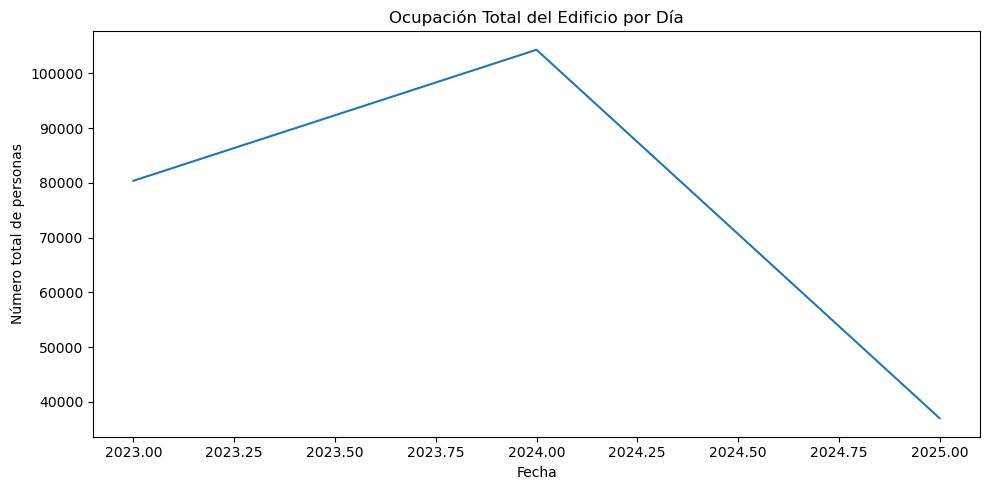

In [132]:
ocupacion_anual = df.groupby("AÑO")["OCUPACION"].sum().reset_index()

# Graficar 
plt.figure(figsize=(10, 5))
sns.lineplot(data=ocupacion_anual, 
             x="AÑO", 
             y="OCUPACION")

plt.title("Ocupación Total del Edificio por Día")
plt.xlabel("Fecha")
plt.ylabel("Número total de personas")

plt.tight_layout()
plt.show()



### **Insight 1**: de 2023 a 2024 el personal que acudio a la oficina aumento un porcentaje considerable. 

In [133]:
ocupacion_diaria = df.groupby("AÑO")["OCUPACION"].sum().reset_index()
ocupacion_diaria


,AÑO,OCUPACION
0,2023,80369
1,2024,104290
2,2025,37013


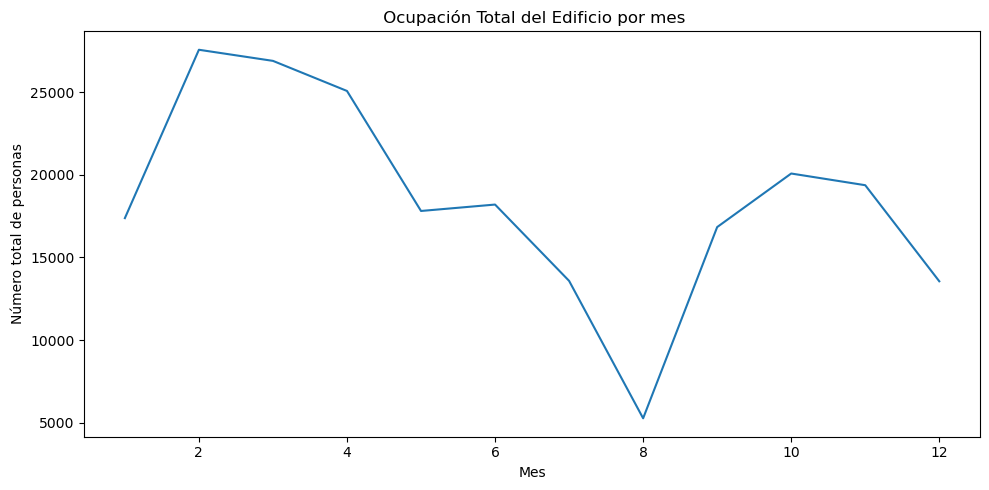

In [134]:
ocupacion_diaria = df.groupby("MES")["OCUPACION"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=ocupacion_diaria, 
             x="MES", 
             y="OCUPACION")

plt.title(" Ocupación Total del Edificio por mes")
plt.xlabel("Mes")
plt.ylabel("Número total de personas")

plt.tight_layout()
plt.show()



### **Insight 2** : EL MES 8 LA BAJADA ES GIGANTE. ¿CONVIENE ABRIR EL EDIFICIO ESE MES?

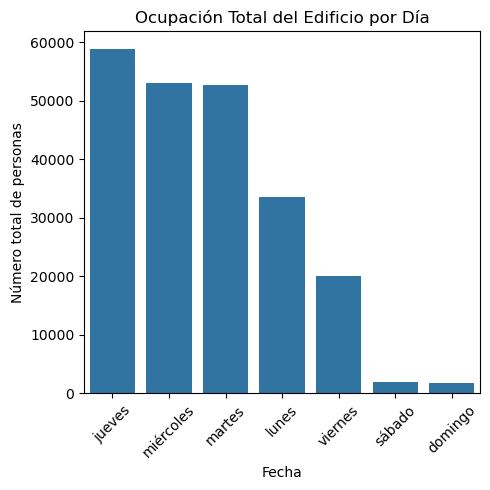

In [136]:
ocupacion_diaria = df.groupby("DIA SEMANA")["OCUPACION"].sum().reset_index()

ocupacion_diaria = ocupacion_diaria.sort_values(by="OCUPACION", ascending=False)

# Plot
plt.figure(figsize=(5, 5))

sns.barplot(data=ocupacion_diaria, 
             x="DIA SEMANA", 
             y="OCUPACION",)


plt.title("Ocupación Total del Edificio por Día")
plt.xlabel("Fecha")
plt.ylabel("Número total de personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Insight 3** : Como vemos hay una disminucion gigante los fines de semana (donde hay personal minimo) pero los dias VIERNES no viene ni la mitad de los empleados que vienen el dia JUEVES por ejemplo. 

In [139]:
ocupacion_diaria = df.groupby("DIA SEMANA")["OCUPACION"].sum().reset_index()
ocupacion_diaria_num = ocupacion_diaria.sort_values(by="OCUPACION", ascending=False)

ocupacion_diaria_num

,DIA SEMANA,OCUPACION
1,jueves,58895
4,miércoles,52987
3,martes,52591
2,lunes,33543
6,viernes,20006
5,sábado,1918
0,domingo,1732


### **Insight 4** : Como seran los dias VIERNES en el MES de AGOSTO donde tenemos una bajada gigante?

In [141]:
df_viernes_agosto = df[(df["MES"] == 8) & (df["DIA SEMANA"] == "viernes")]
df_viernes_agosto

,AÑO,MES,TIPO_PERSONAL,DIA,OCUPACION,DIA SEMANA
322,2023,8,EXTERNO,2023-08-04,44,viernes
323,2023,8,INTERNO,2023-08-04,3,viernes
334,2023,8,EXTERNO,2023-08-11,43,viernes
335,2023,8,INTERNO,2023-08-11,5,viernes
345,2023,8,EXTERNO,2023-08-18,40,viernes
346,2023,8,INTERNO,2023-08-18,5,viernes
358,2023,8,EXTERNO,2023-08-25,42,viernes
359,2023,8,INTERNO,2023-08-25,8,viernes
951,2024,8,EXTERNO,2024-08-02,42,viernes
952,2024,8,INTERNO,2024-08-02,11,viernes


In [ ]:
ocupacion_viernes_agosto = df_viernes_agosto["OCUPACION"].sum()
ocupacion_viernes_agosto



479

In [148]:
promedio_ocupacion_viernes_agosto = df_viernes_agosto["OCUPACION"].mean()
promedio_ocupacion_viernes_agosto


26.61111111111111

### Estamos hablando que 26 personas van los viernes en promedio. En donde se incluye personal indispensable como SEGURIDAD, LIMPIEZA, RECEPCION, MANTENIMIENTO. Si calculamos en numeros generales personal minimo 3 por sector estamos hablando de que solo 14 personas van al edificio un viernes en agosto. 

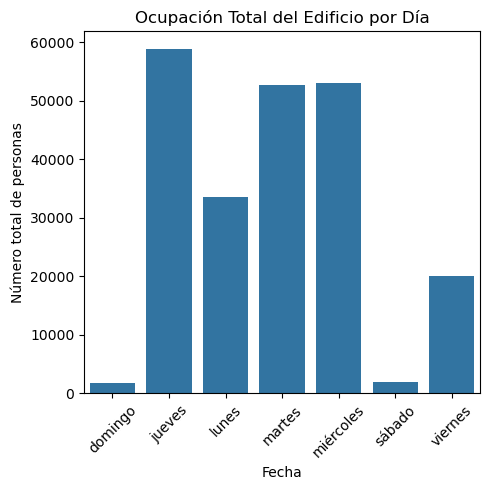

In [149]:
ocupacion_diaria = df.groupby("DIA SEMANA")["OCUPACION"].sum().reset_index()

# Plot
plt.figure(figsize=(5, 5))

sns.barplot(data=ocupacion_diaria, 
             x="DIA SEMANA", 
             y="OCUPACION",)


plt.title("Ocupación Total del Edificio por Día")
plt.xlabel("Fecha")
plt.ylabel("Número total de personas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

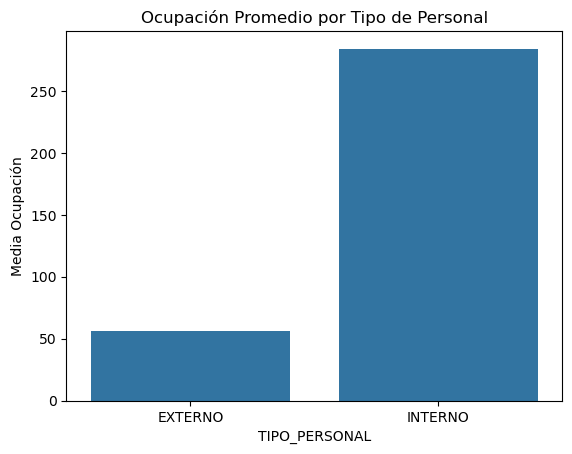

In [107]:
# Ocupación promedio por tipo de personal 
personal = df.groupby("TIPO_PERSONAL")["OCUPACION"].mean().reset_index()

sns.barplot(data=personal,
            x="TIPO_PERSONAL", 
            y="OCUPACION")

plt.ylabel("Media Ocupación")
plt.title("Ocupación Promedio por Tipo de Personal")
plt.show()


In [150]:
df.groupby(["MES", "TIPO_PERSONAL"])["OCUPACION"].mean()


MES  TIPO_PERSONAL
1    EXTERNO           56.854839
     INTERNO          307.933333
2    EXTERNO           61.588235
     INTERNO          333.492537
3    EXTERNO           57.688172
     INTERNO          321.507463
4    EXTERNO           57.166667
     INTERNO          288.971014
5    EXTERNO           58.354839
     INTERNO          330.186047
6    EXTERNO           62.383333
     INTERNO          314.369565
7    EXTERNO           52.032258
     INTERNO          225.152174
8    EXTERNO           41.919355
     INTERNO           57.847826
9    EXTERNO           55.766667
     INTERNO          299.866667
10   EXTERNO           59.322581
     INTERNO          334.816327
11   EXTERNO           59.500000
     INTERNO          351.244444
12   EXTERNO           47.285714
     INTERNO          278.394737
Name: OCUPACION, dtype: float64

### Insight 5: Externos vs Internos por mes. Agosto estan casi iguales.

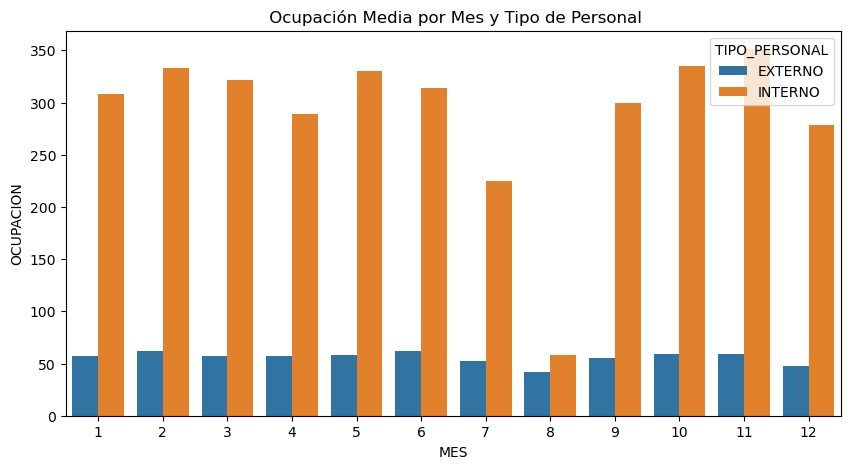

In [154]:
media_mes =df.groupby(["MES", "TIPO_PERSONAL"])["OCUPACION"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=media_mes,
            x="MES",
            y="OCUPACION", 
            hue="TIPO_PERSONAL")

plt.title(" Ocupación Media por Mes y Tipo de Personal")
plt.show()

### Insight 6: HeatMap Identificamos Agosto y vemos los viernes como un dia con muy poca ocupacion

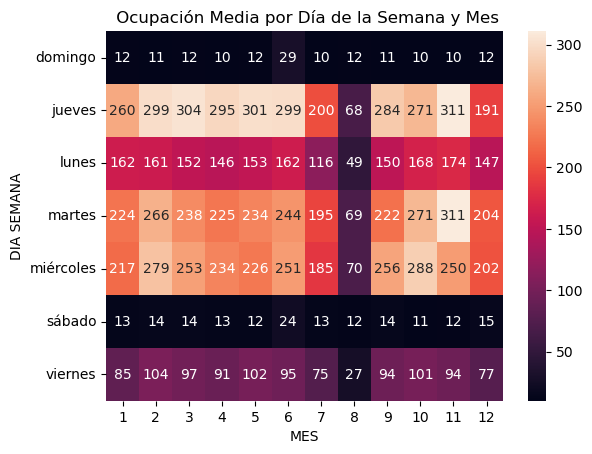

In [160]:
heatmap_df = df.groupby(["DIA SEMANA", "MES"])["OCUPACION"].mean().unstack()
sns.heatmap(heatmap_df, annot=True, fmt=".0f")
plt.title(" Ocupación Media por Día de la Semana y Mes")
plt.show()

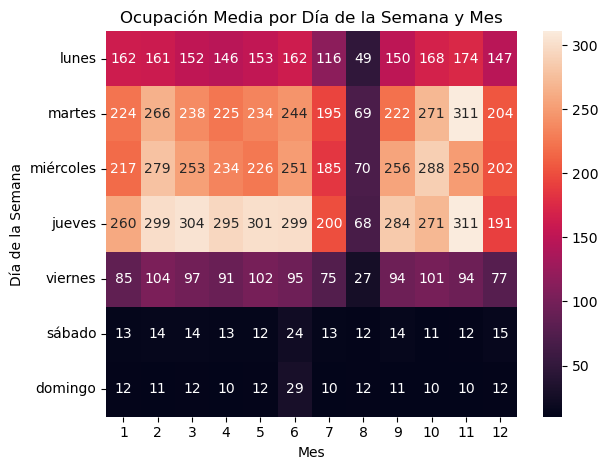

In [161]:
orden_dias = ["lunes", "martes", "miércoles", "jueves", "viernes", "sábado", "domingo"]

# Agrupar y reordenar el índice
heatmap_df = (
    df.groupby(["DIA SEMANA", "MES"])["OCUPACION"]
    .mean()
    .unstack()
    .reindex(orden_dias)
)

# Graficar
sns.heatmap(heatmap_df, annot=True, fmt=".0f")
plt.title("Ocupación Media por Día de la Semana y Mes")
plt.xlabel("Mes")
plt.ylabel("Día de la Semana")
plt.tight_layout()
plt.show()

# Conclusiones
- Identificamos días de baja ocupación que podrían permitir optimizar recursos.
- Se observa una diferencia notable entre personal interno y externo, claramente hay mas internos que externos, pero en el mes 8 los numeros casi se equiparan. 
- La ocupación es más baja los viernes y en ciertos meses aun mas (Agosto).

### Recomendaciones
- Implementar días de teletrabajo para todo el personal (viernes) en agosto.
- Valor implementar el dia viernes como teletrabajo para todo el personal que no sea indispensable.
- Reducir climatización, limpieza en días de baja ocupación, recepcion, personal de seguridad.
- Explorar la posibilidad de cerrar plantas o servicios parcialmente. Contribuir al ahorro energetico. 
